### Covariance, Corelation Computing 
- self_created small dummy dataset with height, weight
- compute covariance

In [8]:
import numpy as np
import pandas as pd

In [27]:
height_weight = pd.read_csv('data/height_weight.csv')

In [6]:
height_weight.head()

,height,weight
0,150,45
1,160,50
2,162,51
3,155,50
4,168,55


In [7]:
height_weight.describe()

,height,weight
count,17.000000,17.000000
mean,164.176471,54.941176
std,7.852032,7.394851
min,150.000000,40.000000
25%,158.000000,50.000000
50%,166.000000,55.000000
75%,171.000000,60.000000
max,175.000000,65.000000


In [14]:
def compute_mean_normalise(var):
    
    mean = np.mean(var)
    size = len(var)
    
    var_sum = []
    
    for i in range(size):
        
        value = var[i] - mean
        
        var_sum.append(value)
        
    return var_sum

In [15]:
x_var = compute_mean_normalise([1,2,3,4,5])
x_var

[-2.0, -1.0, 0.0, 1.0, 2.0]

In [16]:
%matplotlib inline
import seaborn as sns

In [24]:
height_weight.head()

,height,weight
0,150,45
1,160,50
2,162,51
3,155,50
4,168,55


In [28]:
height_weight.columns

Index(['height', 'weight '], dtype='object')

In [39]:
height_weight['weight'] = height_weight['weight ']
height_weight = height_weight.drop('weight ', axis=1)

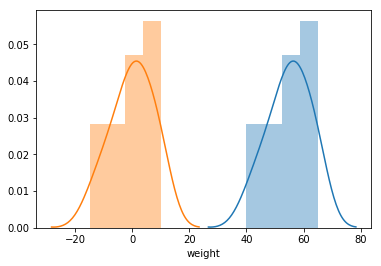

In [31]:
sns.distplot(height_weight.weight)
sns.distplot(compute_mean_normalise(height_weight.weight ))

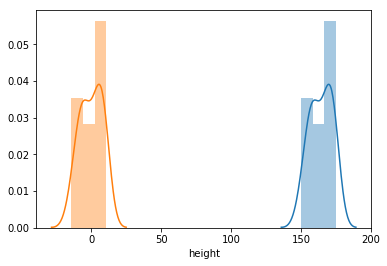

In [32]:
sns.distplot(height_weight.height)
sns.distplot(compute_mean_normalise(height_weight.height ))

In [40]:
def compute_dot_product(var_x, var_y):
    
    size = len(var_x)
    dot_sum = 0
    
    for i in range(size):   
        product = var_x[i] * var_y[i]
        dot_sum += product
    
    return dot_sum
        
compute_dot_product([1,2,3], [4,5,6])       

32

In [41]:
def compute_covariance(var_x, var_y):
    
    size = len(var_x)
    
    if size != len(var_y):
        raise Exception('Sorry, two vectors need to be the same size')
    
    x_mean_norm = compute_mean_normalise(var_x)
    y_mean_norm = compute_mean_normalise(var_y)
    
    dot_sum = compute_dot_product(x_mean_norm, y_mean_norm)
    
    return dot_sum/(size - 1)
    
compute_covariance(height_weight.height, height_weight.weight)

50.448529411764696

In [42]:
height_weight.cov()

,height,weight
height,61.654412,50.448529
weight,50.448529,54.683824


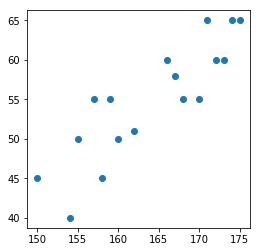

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(height_weight.height, height_weight.weight)


#### Correlation
- tell the extent/degree of how much two variables are related to each other [-1, 1]
- dimensionless, unitliess
- normalised mean 

In [71]:
def compute_correlation(var_x, var_y):
    
    size = len(var_x)
    
    if size != len(var_y):
        raise Exception('sorry, size of var_x and var_y need to be the same')
      
    # calculate nominator of corelation
    corr_nominator = (size - 1) * compute_covariance(var_x, var_y)
    
    # calculate denominator of corelation
    var_x_mean_norm = compute_mean_normalise(var_x)
    var_y_mean_norm = compute_mean_normalise(var_y)
    
    x_sqr_sum = np.sum(np.square(var_x_mean_norm))
    y_sqr_sum = np.sum(np.square(var_y_mean_norm))
    x_y_sqr_prod = x_sqr_sum * y_sqr_sum
    
    corr_denominator = np.sqrt(x_y_sqr_prod)
    
    return corr_nominator/corr_denominator

# compute_correlation([1,2,3], [4,6])
compute_correlation([1,2,3], [4,5,6])

1.0

In [72]:
compute_correlation(height_weight.weight, height_weight.height)

0.8688343747633541

In [59]:
height_weight.corr()

,height,weight
height,1.000000,0.868834
weight,0.868834,1.000000
